In [1]:
import pandas as pd 
import numpy as np
import nltk
import csv
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df= pd.read_csv("D:\\DATA TESTING.csv", sep=',', names=['sentiment', 'txt'])
df_test= pd.read_csv("D:\\DATAUJI_LAMA_.csv", sep=',', names=['sentiment', 'txt'])

In [4]:
df.head(200)

sentiment                                                txt
0            1  Gatot Nurmantyo: Saya Tak Takut Dibilang Provo...
1            1  @RezimTipuDaya @HukumDan @SaputraSuteja @na_di...
2            1  RT @Ponirahmujahid1: Yang masih perduli dengan...
3            1  RT @UllbimaNtb: Sandiaga: Wagub DKI Diserahkan...
4            1  @MichelAdamNew Revolusi mental ternyata.... \n...
5            1  Kebohongan itu sementara. Kebenaran itu kekal....
6            1  @joked2019 Sdh mulai terjebak\n#YangCurangGakT...
7            1  RT @geloraco: KPAI Menentang Ide Menghapus Pel...
8            1  Rasulullah shallallahu ‘alaihi wa sallam bersa...
9            1  @33x_Dzikir Siap.... Semangat... \n\n#YangCura...
10           1  RT @ArulKha55306941: Kata pak Moeldoko...\nRek...
11           1  @rmol_id Haha...justru Kalo rekonsiliasi ,kali...
12           1  @Aretha40365486 Thx u Sis syantik ????\n\n#Yan...
13           1  @joked2019 Berarti utang jangka panjang....sem...
14           1  bagaimana Allah akan meridhoi negara ini bila ...
15           1  Menganggap kejahatan hal biasa, tapi kejahatan...
16           1  @waruga02 @PaEko46152207 Hahaha... Hemat bisa ...
17           1  Sore sabtu... \nMandi udah... \nWangi wangi ud...
18           1  Sandiaga: 3 Hari Ini Banyak Berita yang Lucu-l...
19           1  Kecurangan hal biasa buat para penjahat tapi t...
20           1  #YangCurangGakTenang\nGa asyik hidup ga tenang...
21           1  Rekonsiliasi itu ibarat Kuburan yang disediaka...
22           1  Jangan memulai kebohongan, karna bangkai pasti...
23           1  @mick_170845 @NatashaWikan Amin Allah huma ami...
24           1  @ayu___lah Yg jujur pasti tenang tapi\n#YangCu...
25           1  @AyangCakep Perevisi do'anya Mbah apa kabar..?...
26           1  @AyangCakep Perevisi do'anya Mbah apa kabar..?...
27           1  Pasca pemilu telah terjadi fenomena aneh yang ...
28           1  Jangan memulai kebohongan, karna bangkai pasti...
29           1  Merasa bener & berkuasa apapun yg berseberang ...
..         ...                                                ...
170          0  RT @MichelAdamNew: RAKYAT DIMISKINKAN, LALU DI...
171          0  @Misyy4_C4mill4 @PaEko46152207 @Profesong1 @Mi...
172          0  @Mekoesnadi2 @ARN_1105 @AbengRidwan81 @GalaRem...
173          0  @ardi_riau Ada ada aja Kementan..petani gk dun...
174          0  RT @MichelAdamNew: @opposite6890 NAMA LUAR sam...
175          0  RT @MarcoSatria02: @evalez_fr ngarep banget ,s...
176          0  RT @MichelAdamNew: RAKYAT DIMISKINKAN, LALU DI...
177          0  @BinSukamdo @OpanMinon_ Pak oga kepalanya bota...
178          0  RT @albertjamaris: @MichelAdamNew Yang pasti ?...
179          0  RT @hermana_t: Gatot Nurmantyo mengaku tdk tak...
180          0  RT @MichelAdamNew: RAKYAT DIMISKINKAN, LALU DI...
181          0  RT @hamdyan575: Banyak yang sok sibuk .\nbanya...
182          0  RT @MichelAdamNew: RAKYAT DIMISKINKAN, LALU DI...
183          0  @KyyR44 @tuty_2nd @BinSukamdo @Saefullohtoto1 ...
184          0  @MichelAdamNew @02Abidzar Ya Pastilah\n#YangCu...
185          0  @MichelAdamNew sdh jelas dari dolo arahnya mak...
186          0  RT @MichelAdamNew: PENDANAAN KHUSUS = KALAU GA...
187          0  RT @MichelAdamNew: RAKYAT DIMISKINKAN, LALU DI...
188          0  RT @ifahusna: Kecurangan hal biasa buat para p...
189          0  @BinSukamdo @tuty_2nd @Saefullohtoto1 @bryanva...
190          0  RT @InsyaAllah_02: Waduh\n\nAda 9 Jenis Syetan...
191          0  @amira_swandary Uye....☺\n#YangCurangGakTenang...
192          0  RT @MichelAdamNew: PENDANAAN KHUSUS = KALAU GA...
193          0  RT @CH_chotimah: Stlh kemarin ngomongin yg cur...
194          0  RT @Adhi19680382: "Malu Aku Jadi Orang Indones...
195          0  #YangCurangGakTenang \nPadahal sudah dimenangkan.
196          0       @HajrahDouboegis Emang\n#YangCurangGakTenang
197          0  RT @MichelAdamNew: PENDANAAN KHUSUS = KALAU GA...
198          0  RT @MichelAdamNew: RAKYAT DIM

## Preprocessing

### Case Folding - Lowercase

In [5]:
df.txt = df.txt.str.lower()

In [6]:
df.head(200)

sentiment                                                txt
0            1  gatot nurmantyo: saya tak takut dibilang provo...
1            1  @rezimtipudaya @hukumdan @saputrasuteja @na_di...
2            1  rt @ponirahmujahid1: yang masih perduli dengan...
3            1  rt @ullbimantb: sandiaga: wagub dki diserahkan...
4            1  @micheladamnew revolusi mental ternyata.... \n...
5            1  kebohongan itu sementara. kebenaran itu kekal....
6            1  @joked2019 sdh mulai terjebak\n#yangcuranggakt...
7            1  rt @geloraco: kpai menentang ide menghapus pel...
8            1  rasulullah shallallahu ‘alaihi wa sallam bersa...
9            1  @33x_dzikir siap.... semangat... \n\n#yangcura...
10           1  rt @arulkha55306941: kata pak moeldoko...\nrek...
11           1  @rmol_id haha...justru kalo rekonsiliasi ,kali...
12           1  @aretha40365486 thx u sis syantik ????\n\n#yan...
13           1  @joked2019 berarti utang jangka panjang....sem...
14           1  bagaimana allah akan meridhoi negara ini bila ...
15           1  menganggap kejahatan hal biasa, tapi kejahatan...
16           1  @waruga02 @paeko46152207 hahaha... hemat bisa ...
17           1  sore sabtu... \nmandi udah... \nwangi wangi ud...
18           1  sandiaga: 3 hari ini banyak berita yang lucu-l...
19           1  kecurangan hal biasa buat para penjahat tapi t...
20           1  #yangcuranggaktenang\nga asyik hidup ga tenang...
21           1  rekonsiliasi itu ibarat kuburan yang disediaka...
22           1  jangan memulai kebohongan, karna bangkai pasti...
23           1  @mick_170845 @natashawikan amin allah huma ami...
24           1  @ayu___lah yg jujur pasti tenang tapi\n#yangcu...
25           1  @ayangcakep perevisi do'anya mbah apa kabar..?...
26           1  @ayangcakep perevisi do'anya mbah apa kabar..?...
27           1  pasca pemilu telah terjadi fenomena aneh yang ...
28           1  jangan memulai kebohongan, karna bangkai pasti...
29           1  merasa bener & berkuasa apapun yg berseberang ...
..         ...                                                ...
170          0  rt @micheladamnew: rakyat dimiskinkan, lalu di...
171          0  @misyy4_c4mill4 @paeko46152207 @profesong1 @mi...
172          0  @mekoesnadi2 @arn_1105 @abengridwan81 @galarem...
173          0  @ardi_riau ada ada aja kementan..petani gk dun...
174          0  rt @micheladamnew: @opposite6890 nama luar sam...
175          0  rt @marcosatria02: @evalez_fr ngarep banget ,s...
176          0  rt @micheladamnew: rakyat dimiskinkan, lalu di...
177          0  @binsukamdo @opanminon_ pak oga kepalanya bota...
178          0  rt @albertjamaris: @micheladamnew yang pasti ?...
179          0  rt @hermana_t: gatot nurmantyo mengaku tdk tak...
180          0  rt @micheladamnew: rakyat dimiskinkan, lalu di...
181          0  rt @hamdyan575: banyak yang sok sibuk .\nbanya...
182          0  rt @micheladamnew: rakyat dimiskinkan, lalu di...
183          0  @kyyr44 @tuty_2nd @binsukamdo @saefullohtoto1 ...
184          0  @micheladamnew @02abidzar ya pastilah\n#yangcu...
185          0  @micheladamnew sdh jelas dari dolo arahnya mak...
186          0  rt @micheladamnew: pendanaan khusus = kalau ga...
187          0  rt @micheladamnew: rakyat dimiskinkan, lalu di...
188          0  rt @ifahusna: kecurangan hal biasa buat para p...
189          0  @binsukamdo @tuty_2nd @saefullohtoto1 @bryanva...
190          0  rt @insyaallah_02: waduh\n\nada 9 jenis syetan...
191          0  @amira_swandary uye....☺\n#yangcuranggaktenang...
192          0  rt @micheladamnew: pendanaan khusus = kalau ga...
193          0  rt @ch_chotimah: stlh kemarin ngomongin yg cur...
194          0  rt @adhi19680382: "malu aku jadi orang indones...
195          0  #yangcuranggaktenang \npadahal sudah dimenangkan.
196          0       @hajrahdouboegis emang\n#yangcuranggaktenang
197          0  rt @micheladamnew: pendanaan khusus = kalau ga...
198          0  rt @micheladamnew: rakyat dim

In [7]:
#TFIDF Vectorizer, just like before
stopset = set(stopwords.words('indonesian'))
kataguna = {'baik','guna','bolehlah','cukup','benar','datang','pastilah','jelaslah','ingat-ingat','sudah','umumnya',
            'sebaiknya','mempersiapkan','mampu','ikut','boleh','beri','menjawab','tepat','jelasnya','besar','dekat',
            'biasa','persoalan','menambahkan','sampai','punya','diingat','digunakan','umum','ucap','seorang','tinggi',
            'punya','ditegaskan','memihak','panjang','meminta','bekerja','perlu', 'terlalu','sangat', 'sepihak', 
            'sering','turut','setengah','penting','betul','lamanya','sekurang-kurangnya','lama','minta','meyakini',
            'jumlahnya','keluar','sama-sama','akhir','memberikan','hampir','berikan','tambah','pasti','menegaskan',
            'jawabnya','tengah','diperlukan','percuma','berlainan','diingatkan','tampak','sepanjang','terlebih',
            'berlalu','nyaris','belakang','dipastikan','sebaik','sedikitnya','dikatakan','sekitar','bersiap-siap','pukul', 
            'seenaknya','mempergunakan','terbanyak','semula','sendirian','bermula','selamanya','mengingat','menunjukkan',  
            'keterlaluan','jelas','berturut-turut','menyampaikan','asal','sedikit','berarti','kecil','tutur',
            'ditandaskan','sebisanya','belakangan','lewat','berlebihan','kasus','awal','ungkap','baru','naik','masalah',
            'jauh','memastikan','memberi','bawah','rasa','tandas','semampunya','dikerjakan','akhiri', 'kurang','ingat',
            'bertutur','tahu','sebaik-baiknya','jawab','masing-masing','tegas','menyiapkan','jawaban','bersiap','kira', 
            'khususnya','menandaskan', 'sendiri','korupsi'}
stopsetbaru = stopset - kataguna

print (stopsetbaru)
vectorizer = TfidfVectorizer(use_idf=True, lowercase=True, strip_accents='ascii', stop_words=stopsetbaru)
#print (stopset)

{'mengucapkan', 'sesegera', 'jangan', 'cuma', 'katakanlah', 'se', 'belumlah', 'terus', 'memintakan', 'terdapat', 'bila', 'ditunjuk', 'didatangkan', 'mengibaratkan', 'lanjut', 'terjadi', 'hanyalah', 'bahkan', 'diantara', 'biasanya', 'meskipun', 'inginkan', 'masing', 'kapan', 'tiba', 'kamilah', 'dimaksudkannya', 'olehnya', 'rasanya', 'sebabnya', 'kelihatannya', 'pak', 'ibaratkan', 'dan', 'kitalah', 'pada', 'harus', 'berapa', 'setiap', 'sudahlah', 'hanya', 'mendapat', 'diperbuatnya', 'kembali', 'jika', 'sesuatu', 'dimaksudnya', 'bermaksud', 'dia', 'sesekali', 'seseorang', 'sedang', 'dikatakannya', 'keduanya', 'semata-mata', 'sesudah', 'bakalan', 'sesudahnya', 'sekaligus', 'ditanyai', 'demikianlah', 'memperkirakan', 'sekurangnya', 'sejauh', 'sesuatunya', 'luar', 'pentingnya', 'sinilah', 'buat', 'sekali-kali', 'diminta', 'dimulainya', 'tanyanya', 'berkenaan', 'dilakukan', 'memulai', 'disebutkan', 'karenanya', 'malahan', 'kesampaian', 'bagai', 'dengan', 'masihkah', 'agar', 'mirip', 'tadi', '

In [8]:
#filtered = ["@", ".", "/",":","''","?","!","_","-","\\","=","\n",",","1","2","3","4","5","6","7","8","9","0","RT","#YangCurangGaktenang","\",".","//"]
#for f in filtered:
#    df.txt = df.txt.map ( lambda x: x.replace(f,""))
    

In [9]:
df.txt

0      gatot nurmantyo: saya tak takut dibilang provo...
1      @rezimtipudaya @hukumdan @saputrasuteja @na_di...
2      rt @ponirahmujahid1: yang masih perduli dengan...
3      rt @ullbimantb: sandiaga: wagub dki diserahkan...
4      @micheladamnew revolusi mental ternyata.... \n...
5      kebohongan itu sementara. kebenaran itu kekal....
6      @joked2019 sdh mulai terjebak\n#yangcuranggakt...
7      rt @geloraco: kpai menentang ide menghapus pel...
8      rasulullah shallallahu ‘alaihi wa sallam bersa...
9      @33x_dzikir siap.... semangat... \n\n#yangcura...
10     rt @arulkha55306941: kata pak moeldoko...\nrek...
11     @rmol_id haha...justru kalo rekonsiliasi ,kali...
12     @aretha40365486 thx u sis syantik ????\n\n#yan...
13     @joked2019 berarti utang jangka panjang....sem...
14     bagaimana allah akan meridhoi negara ini bila ...
15     menganggap kejahatan hal biasa, tapi kejahatan...
16     @waruga02 @paeko46152207 hahaha... hemat bisa ...
17     sore sabtu... \nmandi ud

In [10]:
#in this case our dependent variable will be sentiment as 0 (negative) or 1 (positif)
y = df.sentiment

## Stopword removal & Tokenezing & Casefolding

In [11]:
#convert df.txt from text to features
X= vectorizer.fit_transform(df.txt)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['berkali', 'ingat', 'kali', 'kira', 'lamanya', 'mata', 'olah', 'sampai', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [12]:
#6918 observations x 2022 unique words.
print (y.shape)
print (X.shape)

(200,)
(200, 938)


In [13]:
#Test Train Split as usual
X_train, X_valid,y_train, y_valid = train_test_split(X, y, random_state=42)

## Hyperparameter Optimization

In [14]:
#we will train a Tree classifier
highest_accuracy = 0
best_state = 0
for i in range(2):
    clf = DecisionTreeClassifier(criterion='gini', random_state=i)
    clf.fit(X_train, y_train)
    accuracy = roc_auc_score(y_valid, clf.predict_proba(X_valid) [:,1])
    if accuracy > highest_accuracy:
        highest_accuracy = accuracy    
        best_state = i
print(best_state, highest_accuracy)

1 0.7399355877616747


In [15]:
#We can test our model's accuracy like this:

roc_auc_score(y_valid, clf.predict_proba(X_valid) [:,1])

0.7399355877616747

In [16]:
uji_sistem_vector = vectorizer.transform(df_test.txt)

In [17]:
print (clf.predict(uji_sistem_vector))

[1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0
 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0]


## Data uji

In [18]:
#print(data_uji)
add = pd.DataFrame(df_test.txt)
add.head(100)

txt
0   @Abeng_Ridwan81Jika pejuang oposisi jadi nyebo...
1      @ChasseurRouge7 Dont cheat#YangCurangGakTenang
2   @kaizer_1st Bro, can we just done it already?!...
3   @AsFairus Seperti inikah #YangCurangGakTenang ...
4   @utipahkiaDone ras and block...#YangCurangGakT...
5   @bmt_sabaryGo internasional brother#YangCurang...
6                  @anggarini90 Wow The power of love
7   @f212w Hahahahahahahaaaaa....#LegitimasiDitang...
8   @PatpatPatrickSt which is never gonna happened...
9   bener kecurangan kecurangan sistematis dan ter...
10         RT@MichelAdamNewLawan #YangCurangGakTenang
11         RT@Nawaabdullah1betul #YangCurangGakTenang
12  RT@brandalsantri45Jangan ngopihh sembarang! Ng...
13  @Adra_silentSemoga 1 persatu dicabut aja rumpu...
14  @mad_pecciBlm di hapus pelajaran agama aja sdh...
15  @hari_mawonWowww Amazing... Just One Kick... T...
16  @Rakyat_keritisIni lagi makanan halal? Mau dib...
17  @AthaSami yess..#YangCurangGakTenang #YangCura...
18  @DeniFaisal20 Patuh 'ijtima Ulama Damai dlm ak...
19  @Kazumi_kun Kecelakaan besarlah bagi orang-ora...
20  @tanabe_bee MUI Pusat: Hanya Pendukung Komunis...
21  @Ikuadrat03 Cerita malam di ruang sidang PS : ...
22           @waruga_Nampol dong #YangCurangGakTenang
23  @eSKey_KS Segala sesuatu yang dihiasi kecurang...
24        @AsFairus Wait and see #YangCurangGakTenang
25  @RelawanProSandi Kalian katanya harus optimis!...
26             @bib3guna Aduh...#YangCurangGakTenang 
27  @rumah_ke2 Catatan unik, yg menang bukannya si...
28  @K83_TheCoffee Yang Curang Gak Tenang Sepanjan...
29  @Abeng_Ridwan81 Ayo dong pesta ah kan sdh di l...
..                                                ...
70           @NurtejaWahyu Go go#YangCurangGakTenang 
71  @_dilalfa_III Stress #YangCurangGakTenang #Yan...
72  @Padishah_sh Tegar tersumbat..Ganti tagar roje...
73  @aksioma02 ARDATH? Mantap..#YangCurangGakTenan...
74  @blxmultiservic1 Dah d bayar mahal2 tp kinerja...
75  @Djohan73197029 #YangCurangGakTenang welcome l...
76        @sby9090 bisa aja neng #YangCurangGakTenang
77  @caplun6 Dasar dobol #YangCurangGakTenang #Yan...
78                      @bob666rock yg kalah pd Gila 
79  @NugrahaIrwin Jgn ngotot takut uratnya pegatt ...
80  @TanpaWaj4h___ Dimana mana maling emang paling...
81  @NovriyantoYanto Yang CURANG PASTI CELAKA...DI...
82  @BangOi17 Kang bohong Sdh mendarah daging #Yan...
83  @Lyra28081706 Memalukan.. Hanya orang bodoh ya...
84  @baginda1ikbal Udah ada peringatan merokok men...
85  @ElfianSKM Lihatnih gerombolan curang pura2 he...
86  @BertemanM Mereka foya-foya diatas penderitaan...
87  @Sandra_Aidelia Yg bikin status koplak pol.......
88  @rockygerung Dua kata BERJUTA MAKNA, Berjuta k...
89  @geloraco Belagu loe.... Menang Curang ...Bang...
90  @Yusrilihza_Mhd yg lbh hina itu salah langkah ...
91  @fadlizon Haram salaman sama orang yang nipu k...
92  @FerdinandHaean2 Yang jelas ente jangan dekat2...
93  @TofaGarisLurus Percuma dilaporkan juga cuman ...
94  @Entow1j4y4 Emang Gue Pikirin..... #YangCurang...
95  @mama65rocket pas sakratul maut baru berkecamu...
96  @Purwo_no1266 Ya GENDENG Om Sapa gang GENDENG ...
97  @wild_and_gt Juara korupsi PEDEIPEH cebong FYI...
98  @masnun_sukardi yang sok pancasilais sebenarny...
99  @DeeWienna_474 Apalagi disumpahin rakyat 85 ju...

[100 rows x 1 columns]

## Label manual

In [19]:
ujimanual = [1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,1,1,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0
             ,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,1,1,0,0,1,0,0,1,1
             ,1,0,0,0,1,0,1,1,0,0,1,0,0,1,0,1,1,1,1,1,0,0,0,1,0,0]

#print(data_uji)
prediksi = clf.predict(uji_sistem_vector)
ketepatanprediksi = []
for uji in range(len(ujimanual)):
    if ujimanual[uji] == prediksi[uji]:
        ketepatanprediksi.append("Tepat")
    else:
        ketepatanprediksi.append("Tidak Tepat")
add = pd.DataFrame({'Tweet':df_test.txt, 'Sentiment':prediksi, 'Uji Manual':ujimanual, 'Ketepatan Prediksi':ketepatanprediksi})
add.head(100)

Tweet  Sentiment  Uji Manual  \
0   @Abeng_Ridwan81Jika pejuang oposisi jadi nyebo...          1           1   
1      @ChasseurRouge7 Dont cheat#YangCurangGakTenang          0           0   
2   @kaizer_1st Bro, can we just done it already?!...          0           0   
3   @AsFairus Seperti inikah #YangCurangGakTenang ...          0           0   
4   @utipahkiaDone ras and block...#YangCurangGakT...          0           0   
5   @bmt_sabaryGo internasional brother#YangCurang...          0           0   
6                  @anggarini90 Wow The power of love          1           1   
7   @f212w Hahahahahahahaaaaa....#LegitimasiDitang...          0           0   
8   @PatpatPatrickSt which is never gonna happened...          0           0   
9   bener kecurangan kecurangan sistematis dan ter...          1           1   
10         RT@MichelAdamNewLawan #YangCurangGakTenang          0           0   
11         RT@Nawaabdullah1betul #YangCurangGakTenang          0           0   
12  RT@brandalsantri45Jangan ngopihh sembarang! Ng...          0           1   
13  @Adra_silentSemoga 1 persatu dicabut aja rumpu...          0           0   
14  @mad_pecciBlm di hapus pelajaran agama aja sdh...          1           1   
15  @hari_mawonWowww Amazing... Just One Kick... T...          0           0   
16  @Rakyat_keritisIni lagi makanan halal? Mau dib...          0           0   
17  @AthaSami yess..#YangCurangGakTenang #YangCura...          0           1   
18  @DeniFaisal20 Patuh 'ijtima Ulama Damai dlm ak...          1           1   
19  @Kazumi_kun Kecelakaan besarlah bagi orang-ora...          0           0   
20  @tanabe_bee MUI Pusat: Hanya Pendukung Komunis...          1           1   
21  @Ikuadrat03 Cerita malam di ruang sidang PS : ...          1           1   
22           @waruga_Nampol dong #YangCurangGakTenang          0           1   
23  @eSKey_KS Segala sesuatu yang dihiasi kecurang...          1           1   
24        @AsFairus Wait and see #YangCurangGakTenang          0           0   
25  @RelawanProSandi Kalian katanya harus optimis!...          1           1   
26             @bib3guna Aduh...#YangCurangGakTenang           0           0   
27  @rumah_ke2 Catatan unik, yg menang bukannya si...          0           0   
28  @K83_TheCoffee Yang Curang Gak Tenang Sepanjan...          0           0   
29  @Abeng_Ridwan81 Ayo dong pesta ah kan sdh di l...          0           0   
..                                                ...        ...         ...   
70           @NurtejaWahyu Go go#YangCurangGakTenang           0           0   
71  @_dilalfa_III Stress #YangCurangGakTenang #Yan...          0           0   
72  @Padishah_sh Tegar tersumbat..Ganti tagar roje...          0           1   
73  @aksioma02 ARDATH? Mantap..#YangCurangGakTenan...          0           1   
74  @blxmultiservic1 Dah d bayar mahal2 tp kinerja...          1           1   
75  @Djohan73197029 #YangCurangGakTenang welcome l...          0           0   
76        @sby9090 bisa aja neng #YangCurangGakTenang          0           0   
77  @caplun6 Dasar dobol #YangCurangGakTenang #Yan...          0           0   
78                      @bob666rock yg kalah pd Gila           1           1   
79  @NugrahaIrwin Jgn ngotot takut uratnya pegatt ...          0           0   
80  @TanpaWaj4h___ Dimana mana maling emang paling...          1           1   
81  @NovriyantoYanto Yang CURANG PASTI CELAKA...DI...          0           1   
82  @BangOi17 Kang bohong Sdh mendarah daging #Yan...          0           0   
83  @Lyra28081706 Memalukan.. Hanya orang bodoh ya...          0           0   
84  @baginda1ikbal Udah ada peringatan merokok men...          1           1   
85  @ElfianSKM Lihatnih gerombolan curang pura2 he...          0           0   
86  @BertemanM Mereka foya-foya diatas penderitaan...          0           0   
87  @Sandra_Aidelia Yg bikin status koplak pol.......          1           1   
88  @rockygerung Dua kata BERJUTA MAKNA, Berjuta

In [20]:
df ['prediksi'] = pd.DataFrame(prediksi)
df ['ujimanual'] = pd.DataFrame(ujimanual)

In [21]:
 def compute_tp_tn_fn_fp(prediksi, ujimanual):
    tp = sum((prediksi == 1) & (ujimanual == 1))
    tn = sum((prediksi == 0) & (ujimanual == 0))
    fn = sum((prediksi == 0) & (ujimanual == 1))
    fp = sum((prediksi == 1) & (ujimanual == 0))
    return tp, tn, fn, fp

## Hasil perbandingan uji sistem & Manual

In [22]:
tp, tn, fn, fp = compute_tp_tn_fn_fp (df.prediksi, df.ujimanual)
print('TP :', tp)
print('TN :', tn)
print('FN :', fn)
print('FP :', fp)

TP : 26
TN : 54
FN : 14
FP : 6


In [23]:
def compute_akurasi(tp, tn, fn, fp) :

    '''
    akurasi = TP + TN / FP + FN + TP + TN
    
    '''
    return ((tp + tn) * 100)/ float(tp + tn + fn + fp)

In [24]:
print('akurasi :', compute_akurasi(tp, tn, fp, fn))

akurasi : 80.0


In [25]:
print ('akurasi :', compute_akurasi(tp, tn, fn, fp))

akurasi : 80.0


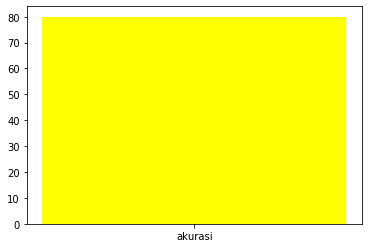

In [30]:
labels = ['akurasi']
values = [compute_akurasi(tp,tn,fn,fp )]
position = [0]
plt.bar (position, values, width=0.5, color='yellow')
plt.xticks(position,labels)
plt.show ()